# Housing Values in Suburbs of Boston
The medv variable is the target variable.

Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

* crim - per capita crime rate by town.

* zn - proportion of residential land zoned for lots over 25,000 sq.ft.

* indus - proportion of non-retail business acres per town.

* chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox - nitrogen oxides concentration (parts per 10 million).

* rm - average number of rooms per dwelling.

* age - proportion of owner-occupied units built prior to 1940.

* dis - weighted mean of distances to five Boston employment centres.

* rad - index of accessibility to radial highways.

* tax - full-value property-tax rate per \$10,000.

* ptratio - pupil-teacher ratio by town.

* b - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat - lower status of the population (percent).

* medv - median value of owner-occupied homes in \$1000s.

### Source
* Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

* Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


# 1. Prepare Problem
1. Load libraries
2. Load dataset

## 1.1 Import Libraries

In [83]:
# Load Libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [84]:
# Python Project Template

# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

pd.set_option('precision', 3)

## 1.2 Load Dataset

In [85]:
# Load dataset
filename = 'boston_housing.csv'
df = pd.read_csv(filename)

# 2. Summarize the Dataset
## 2.a) Descriptive statistics
1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

## 2.b) Data visualizations


### 2.a.1) Dimensions of dataset

In [86]:
# 1. Dimensions of dataset
print(df.shape)

(506, 14)


### 2.a.2) Peek at the data

In [87]:
# 2. Peek at the data
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006,18.0,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
1,0.027,0.0,7.07,0,0.469,6.421,78.9,4.967,2,242,17.8,396.90,9.14,21.6
2,0.027,0.0,7.07,0,0.469,7.185,61.1,4.967,2,242,17.8,392.83,4.03,34.7
3,0.032,0.0,2.18,0,0.458,6.998,45.8,6.062,3,222,18.7,394.63,2.94,33.4
4,0.069,0.0,2.18,0,0.458,7.147,54.2,6.062,3,222,18.7,396.90,5.33,36.2


### 2.a.3) Check for data types and Null values

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


### 2.a.4) Statistical Summary

In [89]:
# 3. Statistical summary of all attributes.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


### 2.a.4) Check Correlation between all the numeric attributes

In [90]:
# correlation
df.corr(method='pearson')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
zn,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
indus,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
chas,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
nox,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
rm,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
age,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
dis,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
rad,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
tax,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


###  Observations
* There are 506 observations with 14 features each.
* There are no null values, so we don't have to worry about that.


## 2.b) Data Visualization

### 2.b.1) Univariate Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13cbfce80>,
      dtype=object)

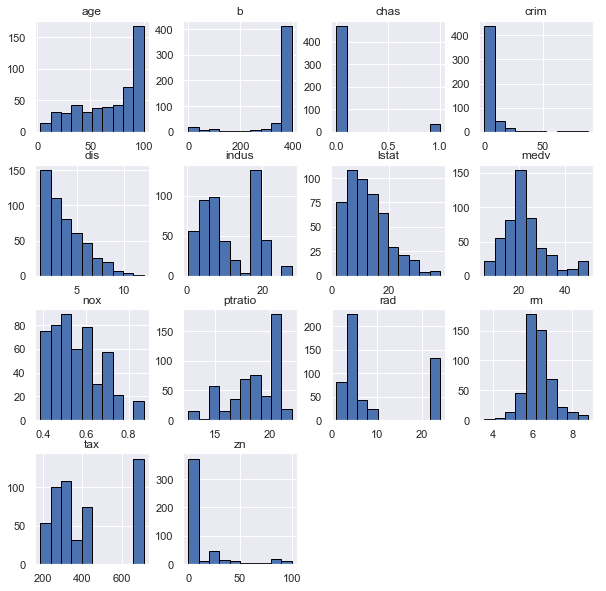

In [91]:
# histograms
df.hist(edgecolor='black', linewidth=1, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139897748>,
      dtype=object)

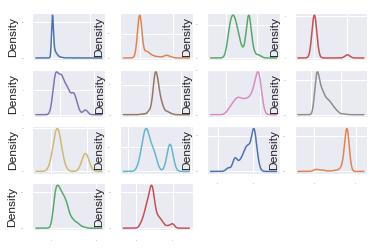

In [92]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)

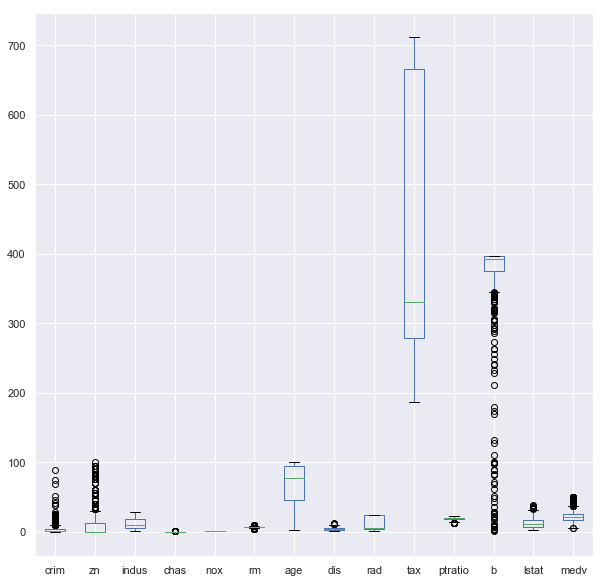

In [93]:
# boxplot on each feature split out by species
df.boxplot(figsize=(10,10))

### 2.b.2) Multivariate Plots

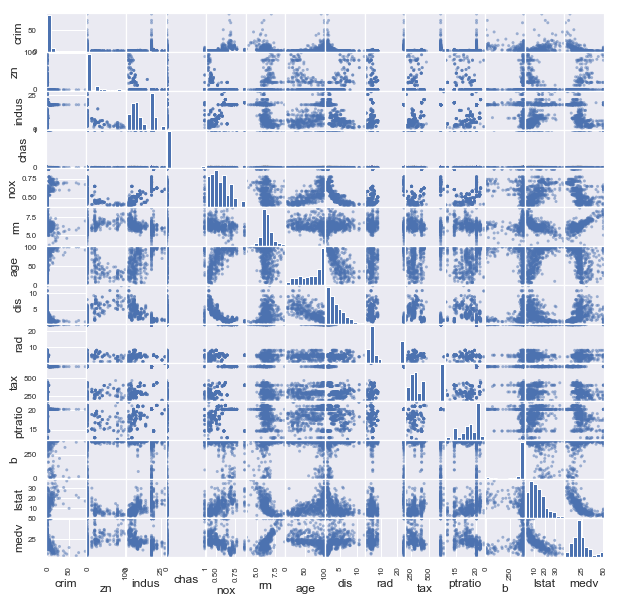

In [94]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(df,figsize=(10,10))
plt.show()

* We can also replace the histograms shown in the diagonal of the pairplot by kde.

[Text(0.5, 0, 'crim'),
 Text(1.5, 0, 'zn'),
 Text(2.5, 0, 'indus'),
 Text(3.5, 0, 'chas'),
 Text(4.5, 0, 'nox'),
 Text(5.5, 0, 'rm'),
 Text(6.5, 0, 'age'),
 Text(7.5, 0, 'dis'),
 Text(8.5, 0, 'rad'),
 Text(9.5, 0, 'tax'),
 Text(10.5, 0, 'ptratio'),
 Text(11.5, 0, 'b'),
 Text(12.5, 0, 'lstat'),
 Text(13.5, 0, 'medv')]

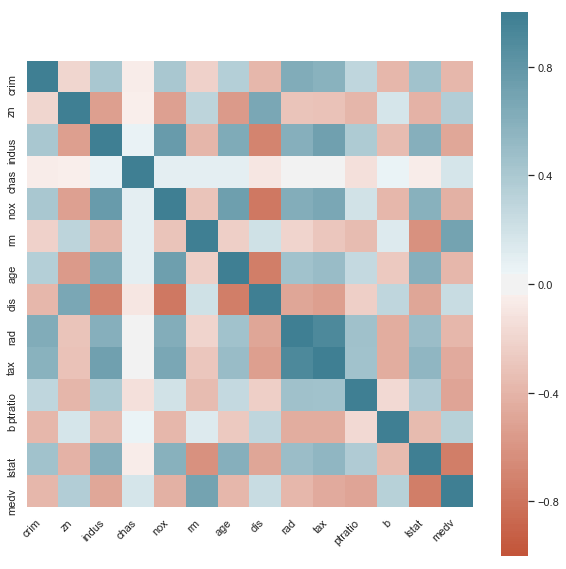

In [95]:
# Correlation Matrix plots

corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# 3. Prepare Data

1. a) Data Cleaning
2. b) Feature Selection
3. c) Data Transforms

#  4. Evaluate Algorithms
1. a) Split-out validation dataset
2. b) Test options and evaluation metric
3. c) Spot Check Algorithms
4. d) Compare Algorithms

## 4.1 Split-out validation dataset

In [96]:
y = df['medv']
X = df.drop(['medv'], axis=1)
# print(X)
validation_size = 0.20
seed = 7
scoring = 'neg_mean_squared_error'


In [97]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=validation_size, random_state=seed)

## 4.2 Test Harness
* We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. We are using the metric of accuracy to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 4.3 Spot Check Algorithms
* Linear Regression (LR).
* Lasso.
* ElasticNet (EN).
* KNeighbours Regressor(KNN). 
* Decision Tree Regressor (CART).
* Support Vector Regressor (SVR).

In [98]:
models = []

models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{} {} {}'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR -21.379855726678684 9.41426365698475
LASSO -26.42356110840965 11.651109915777916
EN -27.50225935066171 12.3050222641127
KNN -41.89648839024391 13.901688149849864
CART -25.19550487804878 12.77957009659057
SVR -85.51834183929131 31.99479823184288


## 4.4 Compare Algorithms

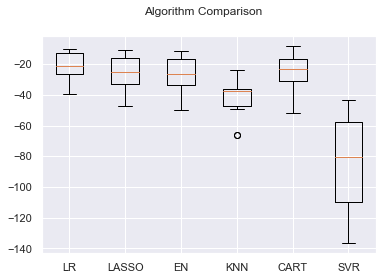

In [99]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN.

## 4.5 Evaluate Algorithms: Standardization

In [100]:
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))


results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{} {} {}'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR -21.379855726678567 9.414263656984714
ScaledLASSO -26.607313557676612 8.97876148589026
ScaledEN -27.932372158135518 10.587490490139402
ScaledKNN -20.107620487804876 12.376949150820472
ScaledCART -23.988642682926827 9.234513761455773
ScaledSVR -29.633085500303213 17.009186052351563


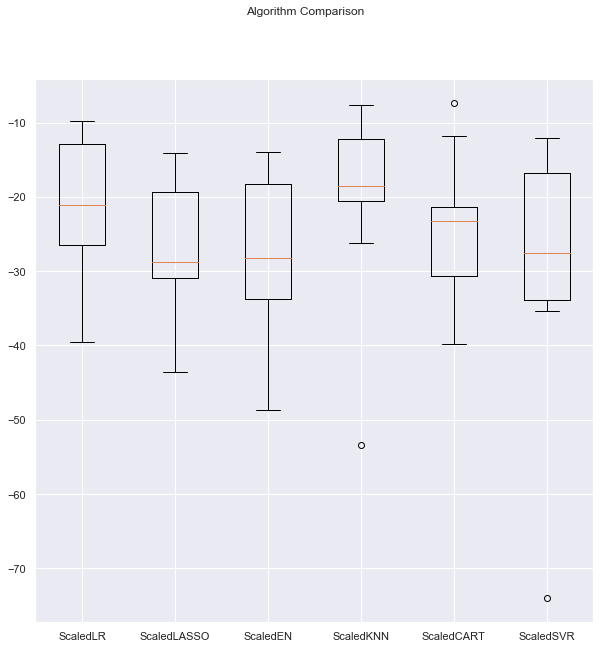

In [101]:
# compare algorithms after standardization
fig = plt.figure(figsize=(10,10))

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 5. Improve Accuracy
* a) Algorithm Tuning
* b) Ensembles


## 5.a Algorithm Tuning
* We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. But can it do better. The default value for the number of neighbors in KNN is 7.
* We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score.
* below we tried odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset

In [102]:
# KNN Algorithm tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)


# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
# param_grid = dict(n_neighbours=k_values)
# model = KNeighborsRegressor()
# kfold = KFold(n_splits=10, random_state=seed)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
# grid_result = grid.fit(rescaledX, Y_train)
print('Best {:.2f} using {}'.format(grid_result.best_score_, grid_result.best_params_))
print('\n')     
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
      print('{:.2f} ({:.2f}) with: {}'.format(mean, stdev, param))

Best -18.17 using {'n_neighbors': 3}


-20.21 (15.03) with: {'n_neighbors': 1}
-18.17 (12.95) with: {'n_neighbors': 3}
-20.13 (12.20) with: {'n_neighbors': 5}
-20.58 (12.35) with: {'n_neighbors': 7}
-20.37 (11.62) with: {'n_neighbors': 9}
-21.01 (11.61) with: {'n_neighbors': 11}
-21.15 (11.94) with: {'n_neighbors': 13}
-21.56 (11.54) with: {'n_neighbors': 15}
-22.79 (11.57) with: {'n_neighbors': 17}
-23.87 (11.34) with: {'n_neighbors': 19}
-24.36 (11.91) with: {'n_neighbors': 21}


## 5.b Ensemble Methods
* Another way that we can improve the performance of algorithms on this problem is by using ensemble methods.
* we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

#### * Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
#### * Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [103]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))


results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{} {} {}'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB -14.914449184606525 6.489095976182635
ScaledGBM -9.887194287331917 4.359427854356065
ScaledRF -13.394560774390243 6.536348803612392
ScaledET -10.56260206707317 4.80821042895144


[Text(0, 0, 'ScaledAB'),
 Text(0, 0, 'ScaledGBM'),
 Text(0, 0, 'ScaledRF'),
 Text(0, 0, 'ScaledET')]

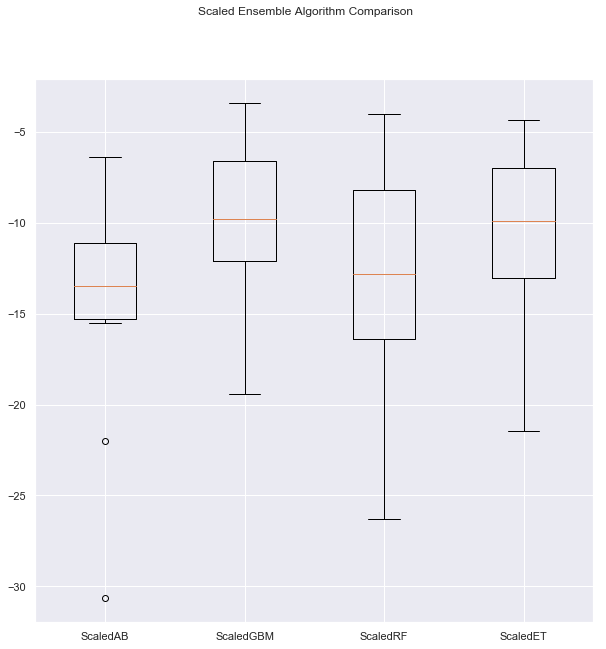

In [104]:
# Compare Algorithms
fig = plt.figure(figsize=(10,10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Observations
* It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution and perhaps a better median score.

* We can probably do better, given that the ensemble techniques used the default parameters. 
In the next section we will look at tuning the Gradient Boosting to further lift the performance.

### 5.c tuning the Gradient Boosting(ensemble model) to further lift the performance.

In [105]:
# Tune Scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400, 450, 500, 550]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=10, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [106]:
print('Best {:.2f} using {}'.format(grid_result.best_score_, grid_result.best_params_))
print('\n')     
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
      print('{:.2f} ({:.2f}) with: {}'.format(mean, stdev, param))

Best -9.35 using {'n_estimators': 500}


-10.81 (4.72) with: {'n_estimators': 50}
-10.04 (4.44) with: {'n_estimators': 100}
-9.69 (4.28) with: {'n_estimators': 150}
-9.54 (4.27) with: {'n_estimators': 200}
-9.45 (4.26) with: {'n_estimators': 250}
-9.43 (4.27) with: {'n_estimators': 300}
-9.37 (4.25) with: {'n_estimators': 350}
-9.35 (4.27) with: {'n_estimators': 400}
-9.35 (4.28) with: {'n_estimators': 450}
-9.35 (4.30) with: {'n_estimators': 500}
-9.35 (4.31) with: {'n_estimators': 550}


# 6. Finalize Model
* a) Predictions on validation dataset
* b) Create standalone model on entire training dataset
* c) Save model for later use

In [108]:
# prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
rescaledValX = scaler.transform(X_val)

predictions = model.predict(rescaledValX)

# MSE 
print('The MSE of the Gradient Boosting Regressor on test data is {:.2f}'.format(mean_squared_error(Y_val, predictions)))


The MSE of the Gradient Boosting Regressor on test data is 11.88


## 6.3 Save model for later use


In [109]:
from pickle import dump
from pickle import load

In [110]:
filename = 'boston_gbr.sav'
dump(model, open(filename, 'wb'))

In [111]:
# load the model from disk
loaded_model = load(open(filename, 'rb')) 
predictions = loaded_model.predict(rescaledValX)
print('The MSE of the Gradient Boosting Regressor on test data is {:.2f}'.format(mean_squared_error(Y_val, predictions)))

The MSE of the Gradient Boosting Regressor on test data is 11.88
